# Project: Airline_Tickets data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

#### This data set contains information about 12 different airlines collected from a Airline database, including everything related to these companies.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn') #ggplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

 <a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
data = pd.read_excel('Data_Train_Airline_Tickets.xlsx')

In [3]:
df = data.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Chcking if there is null values or not

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()
# or df.isnull().any()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Found only 1 value in (Route) is null & only 1 value in (Total_Stops) is null 
### So I Will Drop these values

In [7]:
df.dropna(inplace = True)

### I check agin to see the edit

In [8]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

### Check if price has 0 values

In [9]:
df[df['Price'] == 0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [10]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

### transform values of column (Total_Stops) from string to numbers

In [11]:
df.Total_Stops.replace({'non-stop':0 , '1 stop' : 1 , '2 stops' : 2 , '3 stops' : 3 , '4 stops': 4} , inplace = True)

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [13]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Transform column (Date_of_Journey) to 2 columns (Day, Month) and not need to column   (Year) => Because only one value is unique = 2019

In [14]:
df['Journey(Day)'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey(Month)'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey(Day),Journey(Month)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [16]:
df['Duration(Hours)'] = df.Duration.str.split('h', expand = True)[0]
df['Duration(Minutes)'] = df.Duration.str.split(' ', expand = True)[1]

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey(Day),Journey(Month),Duration(Hours),Duration(Minutes)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2,50m
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,7,25m
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,19,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,5,25m
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,4,45m


In [18]:
df['Duration(Minutes)'] = df['Duration(Minutes)'].str.replace('m', '')

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey(Day),Journey(Month),Duration(Hours),Duration(Minutes)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,19,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,4,45


In [20]:
df['Duration(Minutes)'] = df['Duration(Minutes)'].fillna(0)

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey(Day),Journey(Month),Duration(Hours),Duration(Minutes)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,4,45


In [22]:
df['Duration(Hours)'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [23]:
df['Duration(Hours)'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
5m       1
41       1
40       1
Name: Duration(Hours), dtype: int64

### I found wrong data in (Duration)
### So I drop these values

In [24]:
##df[df['Duration(Hours)'] == '5m']

df.drop(df.loc[df['Duration(Hours)'] == '5m'].index, inplace=True)
df.drop(df.loc[df['Duration(Hours)'] == '42'].index, inplace=True)
df.drop(df.loc[df['Duration(Hours)'] == '39'].index, inplace=True)
df.drop(df.loc[df['Duration(Hours)'] == '41'].index, inplace=True)
df.drop(df.loc[df['Duration(Hours)'] == '40'].index, inplace=True)

In [25]:
df['Duration(Hours)'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31'], dtype=object)

### Convert the Duration(Hours) and Duration(Minutes) into a new column called (Duration_Of_Minutes)
#### First convert datatype from str to int
#### Then Convert hours to minutes


In [26]:
df['Duration(Hours)'] = df['Duration(Hours)'].astype(int)
df['Duration(Minutes)'] = df['Duration(Minutes)'].astype(int)

In [27]:
df['Duration(Hours)'].unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31])

In [28]:
df['Duration(Minutes)'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40])

In [29]:
df['Duration(Hours)'] = df['Duration(Hours)'] * 60
df["Duration_Of_Minutes"] = df['Duration(Minutes)'] + df['Duration(Hours)']

###  I will drop all the columns that I do not need

In [30]:
df = df.drop(columns = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Duration(Hours)', 'Duration(Minutes)'])

In [31]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,170
1,Air India,Kolkata,Banglore,2,7662,1,5,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,285
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,150
10679,Air India,Kolkata,Banglore,0,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,180
10681,Vistara,Banglore,New Delhi,0,12648,1,3,160


In [32]:
df.describe()

,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes
count,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000
mean,0.823419,9083.631382,13.510726,4.709696,642.066511
std,0.674778,4610.526689,8.478265,1.163967,506.151059
min,0.000000,1759.000000,1.000000,3.000000,75.000000
25%,0.000000,5276.500000,6.000000,3.000000,170.000000
50%,1.000000,8372.000000,12.000000,5.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2860.000000


In [33]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
8853       1
14153      1
8488       1
7826       1
12648      1
Name: Price, Length: 1868, dtype: int64

In [34]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,170
1,Air India,Kolkata,Banglore,2,7662,1,5,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,285
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,150
10679,Air India,Kolkata,Banglore,0,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,180
10681,Vistara,Banglore,New Delhi,0,12648,1,3,160


In [35]:
df.describe()

,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes
count,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000
mean,0.823419,9083.631382,13.510726,4.709696,642.066511
std,0.674778,4610.526689,8.478265,1.163967,506.151059
min,0.000000,1759.000000,1.000000,3.000000,75.000000
25%,0.000000,5276.500000,6.000000,3.000000,170.000000
50%,1.000000,8372.000000,12.000000,5.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2860.000000


### I found (price) has outliers values
#### So I use IQR to handle these values

In [36]:
IQR = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
limit = df['Price'].quantile(0.75)+(1.5 * IQR)

In [37]:
outlies = df[df['Price'] > limit].index

In [38]:
df.drop(outlies,inplace=True)

In [39]:
df.describe()

,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes
count,10581.000000,10581.000000,10581.000000,10581.000000,10581.00000
mean,0.820622,8894.055288,13.606181,4.724695,640.88933
std,0.675912,4067.566275,8.444884,1.157985,506.62406
min,0.000000,1759.000000,1.000000,3.000000,75.00000
25%,0.000000,5228.000000,6.000000,4.000000,170.00000
50%,1.000000,8355.000000,12.000000,5.000000,515.00000
75%,1.000000,12305.000000,21.000000,6.000000,930.00000
max,4.000000,23001.000000,27.000000,6.000000,2860.00000


<a id='eda'></a>
## Exploratory Data Analysis


In [40]:
df.corr()

,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes
Total_Stops,1.000000,0.667262,-0.004214,0.062973,0.740032
Price,0.667262,1.000000,-0.118106,-0.049560,0.572681
Journey(Day),-0.004214,-0.118106,1.000000,-0.056138,-0.018785
Journey(Month),0.062973,-0.049560,-0.056138,1.000000,0.021325
Duration_Of_Minutes,0.740032,0.572681,-0.018785,0.021325,1.000000


Text(0.5, 1.0, 'CORRELATION MATRIX')

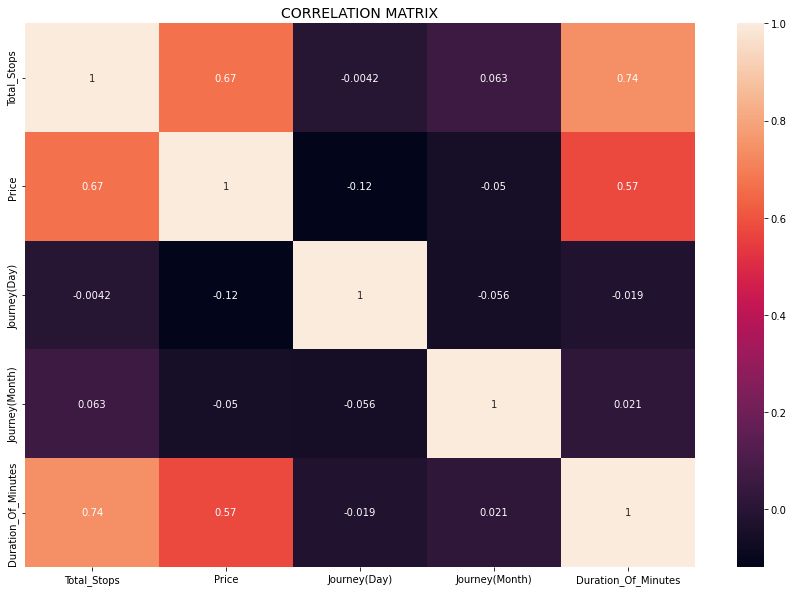

In [41]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

<Figure size 432x288 with 0 Axes>

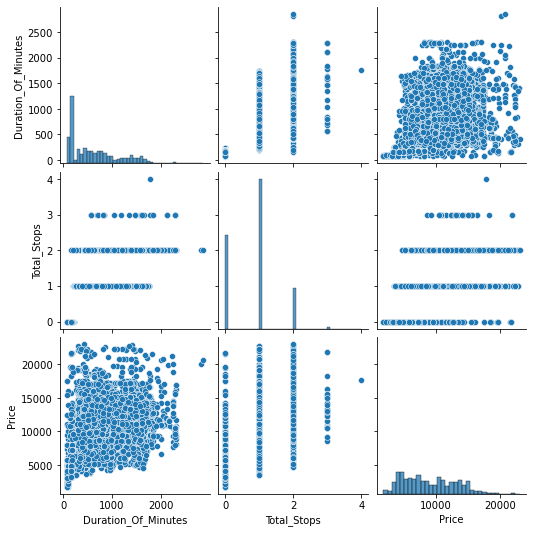

In [42]:
plt.figure()
sns.pairplot(df[['Duration_Of_Minutes','Total_Stops','Price']],palette='dark',diag_kind='hist')
plt.show()

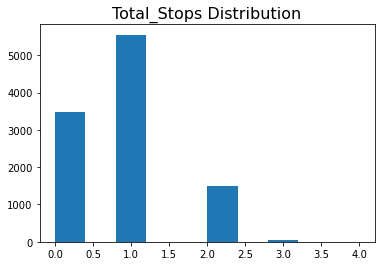

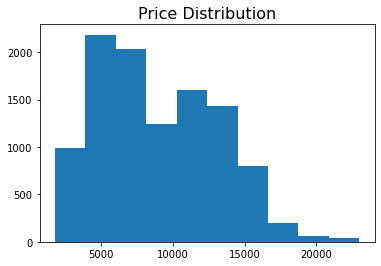

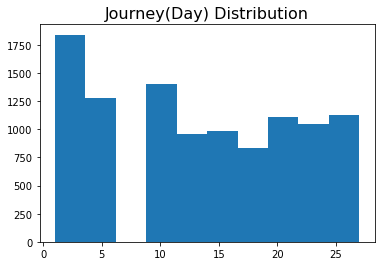

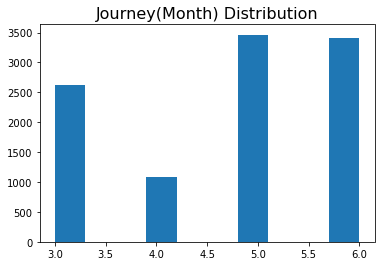

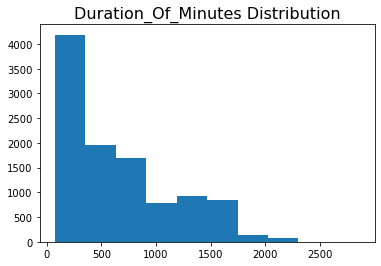

In [43]:
features = df.columns[df.dtypes!='object']

def my_plot(feature):
    plt.hist(df[feature])
    plt.title(f'{feature} Distribution',size=16)
    plt.show()
        
for feature in features:
    my_plot(feature)

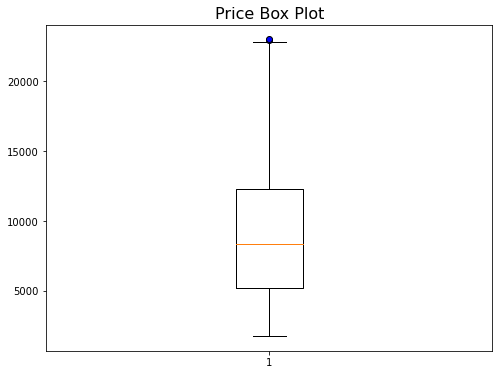

In [44]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Price'], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
plt.title('Price Box Plot', size=16)
plt.show()

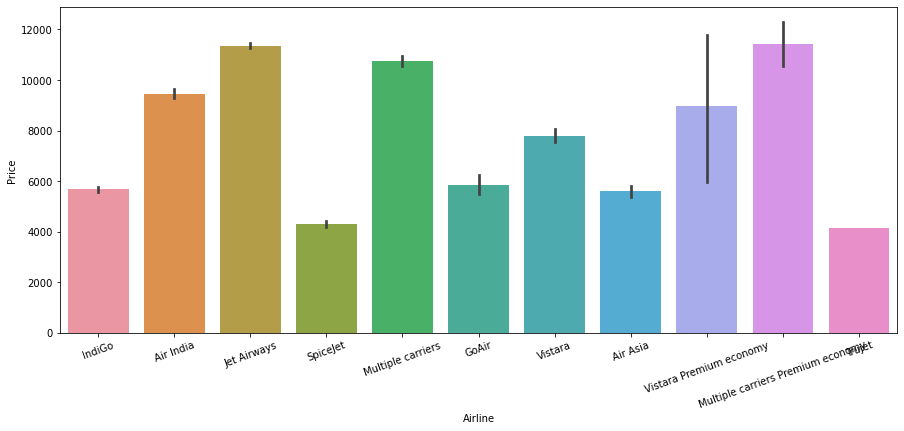

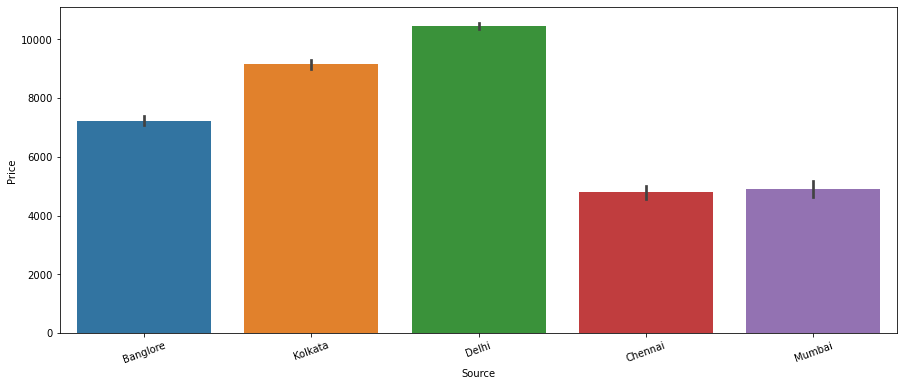

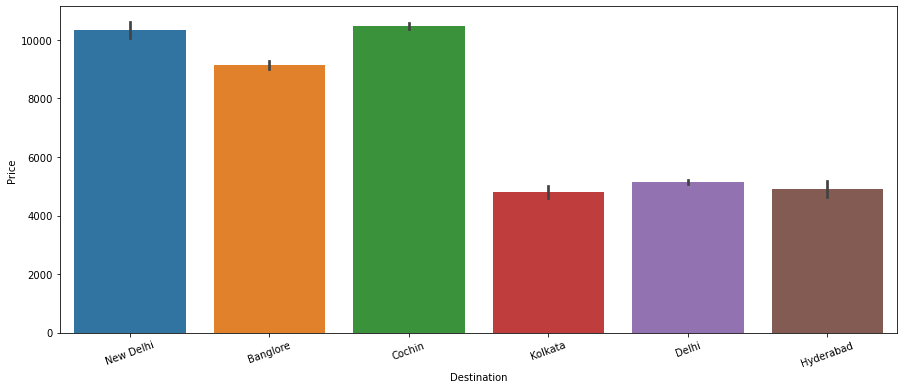

In [45]:
features2 = df.columns[df.dtypes == 'object']

def my_plot2(feature2):
    plt.figure(figsize = (15,6))
    sns.barplot(data= df , x = feature2, y = 'Price')
    plt.xticks(rotation = '20')
    plt.show()
        
for feature2 in features2:
    my_plot2(feature2)

<Figure size 432x288 with 0 Axes>

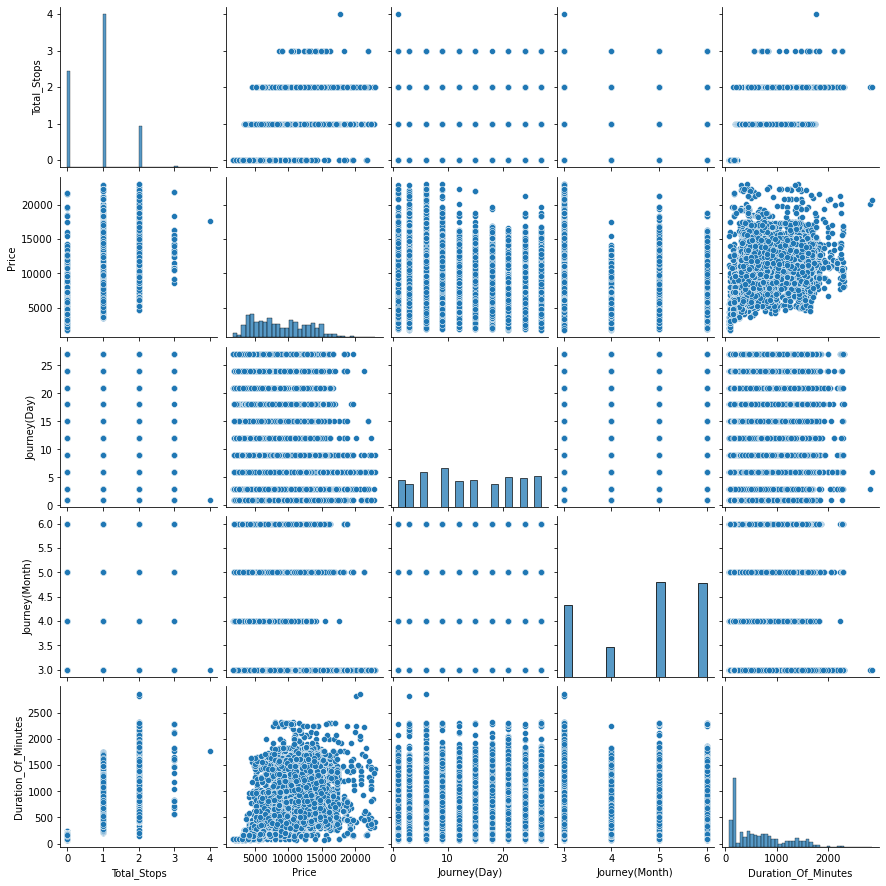

In [46]:
plt.figure()
sns.pairplot(df[df.columns], palette='dark', diag_kind="hist")
plt.show()

In [47]:
final_data = pd.get_dummies(df)
final_data

,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,170,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,445,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,1140,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,325,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,285,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,150,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,155,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,180,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,160,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
scaler=MinMaxScaler()
scaler.fit(final_data)
final_data2=pd.DataFrame(scaler.transform(final_data),columns=final_data.columns)
final_data2

,Total_Stops,Price,Journey(Day),Journey(Month),Duration_Of_Minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.00,0.100650,0.884615,0.000000,0.034111,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.277893,0.000000,0.666667,0.132855,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.570709,0.307692,1.000000,0.382406,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,0.209914,0.423077,0.666667,0.089767,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.543405,0.000000,0.000000,0.075404,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,0.00,0.110536,0.307692,0.333333,0.026930,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10577,0.00,0.112325,1.000000,0.333333,0.028725,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10578,0.00,0.257509,1.000000,0.333333,0.037702,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10579,0.00,0.512617,0.000000,0.000000,0.030521,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
X=final_data2.drop(columns=["Price"])
y=final_data2["Price"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
y_train

7675    0.532342
8788    0.318708
4309    0.163120
8875    0.116138
7331    0.649421
          ...   
9225    0.573486
4859    0.202900
3264    0.347190
9845    0.098437
2732    0.136946
Name: Price, Length: 8464, dtype: float64

In [51]:
x_train.shape , x_test.shape

((8464, 26), (2117, 26))

In [52]:
y_train.shape , y_test.shape

((8464,), (2117,))

In [53]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0.46020508, 0.42785645, 0.00866699, ..., 0.4498291 , 0.50769043,
       0.09521484])

In [54]:
y_test

3505     0.514688
6271     0.616185
1454     0.009698
7880     0.400292
3021     0.294558
           ...   
9096     0.400292
1819     0.180868
6025     0.427690
10340    0.495481
10136    0.099520
Name: Price, Length: 2117, dtype: float64

In [55]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))

MAE =  0.0894
RMSE =  0.118


In [56]:
##df_objs = df.select_dtypes(include=['object'])

In [57]:
##df_clear = pd.get_dummies(df_objs, drop_first=True)

In [58]:
##pd.get_dummies(df_objs, drop_first=True).columnsdf

In [59]:
##df[df['Duration(Hours)'] == '39']

In [60]:
##df['Duration(Hours)'].fillna(0, inplace=True)

In [61]:
##df['Duration(Hours)'] = df['Duration(Hours)'] * 60
##df["Duration_Of_Minutes"] = df['Duration(Minutes)'] * df['Duration(Hours)']

In [62]:
##df['Duration(Hours)'] = df['Duration(Hours)'].astype(int)

In [63]:
##df.drop(df.loc[df['Duration(Hours)']==('39', '40')].index, inplace=True)

In [64]:
#def filter_rows_by_values(df, col, values, true_or_false = False):
   #return df[df[col].isin(values) == true_or_false]

In [65]:
#filter_rows_by_values(data, "Duration", ["5m"], True)

In [66]:
#df.groupby(['Additional_Info']).Price.agg([len, min, max])